In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from webcolors import name_to_hex

# 0 - Import data set

In [2]:
main_df = pd.read_csv("../data/cleaned_data.csv") 

In [3]:
main_df.head(2)

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,type,paint_color,description,state,lat,long,posting_date,post_day,post_month,post_year
0,7316814884,auburn,https://auburn.craigslist.org,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,...,pickup,white,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 17:31:18+00:00,4,5,2021
1,7316814758,auburn,https://auburn.craigslist.org,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,...,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 17:31:08+00:00,4,5,2021


# 1 - Basic questions

## 1.1 - What are the top five manufacturers?

In [4]:
top_5_manufacturers = main_df['manufacturer'].value_counts().head(5)

C:\Users\thebo\AppData\Local\Temp\ipykernel_45656\871441221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_manufacturers.index, y=top_5_manufacturers.values, palette='viridis')


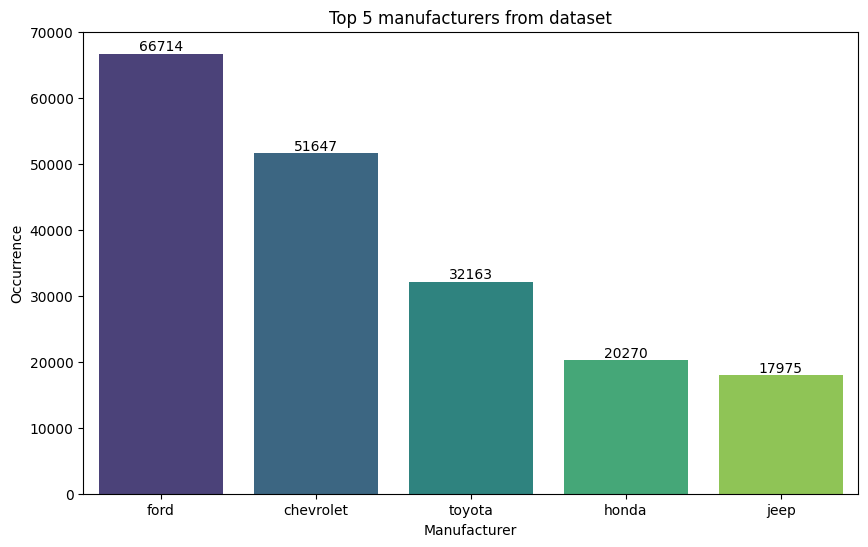

In [5]:
plt.figure(figsize=(10, 6))
# pal = sns.color_palette("Blues",n_colors=5)
# pal.reverse()
ax = sns.barplot(x=top_5_manufacturers.index, y=top_5_manufacturers.values, palette='viridis')
plt.title('Top 5 manufacturers from dataset')
plt.xlabel('Manufacturer')
plt.ylabel('Occurrence')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

## 1.2 - What are the top 10 models?

In [6]:
top_models = main_df['model'].value_counts().head(10)

C:\Users\thebo\AppData\Local\Temp\ipykernel_45656\2684037656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')


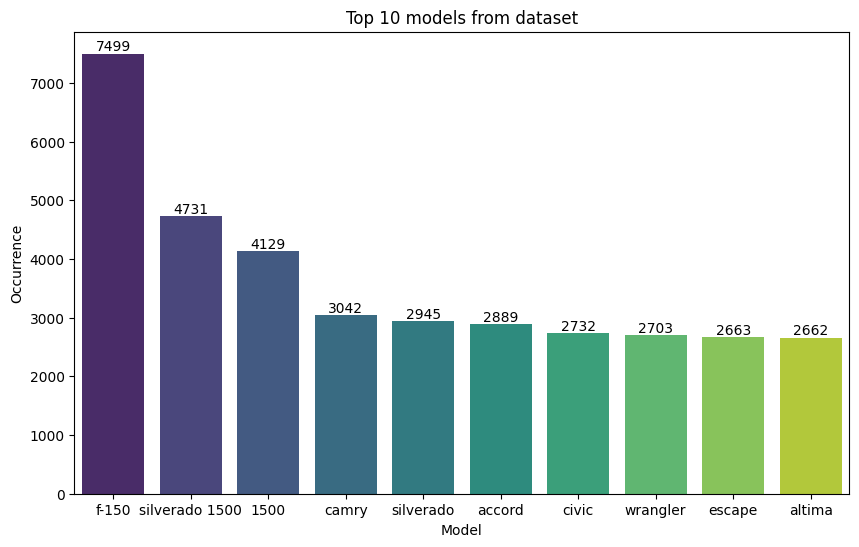

In [7]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')
plt.title('Top 10 models from dataset')
plt.xlabel('Model')
plt.ylabel('Occurrence')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

## 1.2b - Top 10 models with manufacturers detail

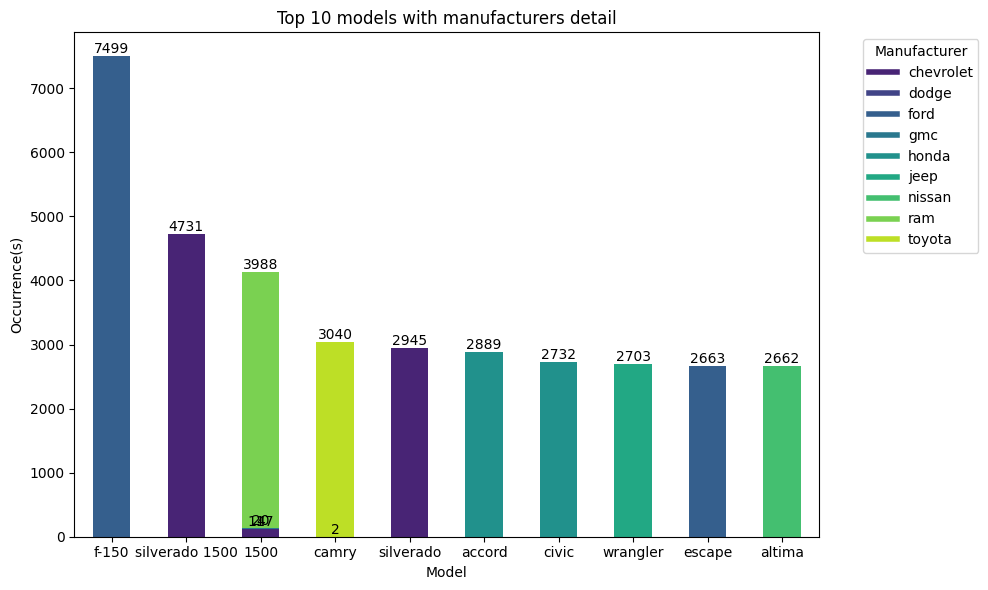

In [8]:
top_models = main_df['model'].value_counts().head(10)

top_10_df = main_df[main_df['model'].isin(top_models.index)][['manufacturer', 'model']]
top_10_df = top_10_df.groupby(['model', 'manufacturer']).size().reset_index(name='count')

pivot_df = top_10_df.pivot(index='model', columns='manufacturer', values='count')

#palette
constructeurs = pivot_df.columns
palette = sns.color_palette("viridis", len(constructeurs))
color_map = dict(zip(constructeurs, palette))

filtered_pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
filtered_pivot_df.plot(kind='bar', stacked=True, color=[color_map[col] for col in filtered_pivot_df.columns], ax=plt.gca())
plt.title('Top 10 models with manufacturers detail')
plt.xlabel('Model')
plt.ylabel('Occurrence(s)')
plt.xticks(rotation=0)


for p in plt.gca().patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if int(height) > 0 :
            plt.gca().annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', xytext = (0, 5), textcoords = 'offset points')


#Legend
handles = [plt.Line2D([0], [0], color=color_map[constructeur], lw=4) for constructeur in constructeurs]
plt.legend(handles, constructeurs, title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Even if the bar chart is not the best, we can see a few things: 
- The most offered vehicle is the Ford F-150 (by far!)
- The model "1500" is mainly RAM but we can see some of the offers indicate "1500" for the Silverado 1500
- Speaking of that, the naming for this one is a bit complex apparently because we find it under 3 titles: Silverado 1500, Silverado and 1500...
- The most popular type of vehicle seems to be light-duty trucks (or pickups) with an obvious distance from the next following type (mid-size car)
- Also, two Camry are specified as "Nissan" (see below) where the equivalent model is "Altima"

In [9]:
camry_error = main_df[(main_df['model'] == 'camry') & (main_df['manufacturer'] != 'toyota')]
camry_error

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,type,paint_color,description,state,lat,long,posting_date,post_day,post_month,post_year
214850,7316191642,hickory / lenoir,https://hickory.craigslist.org,17995,2017,nissan,camry,NaN,NaN,gas,...,NaN,NaN,2 to Choose From 2017 Red Camry Air Conditioni...,nc,35.6884,-81.3612,2021-05-03 14:48:18+00:00,3,5,2021
215028,7311592267,hickory / lenoir,https://hickory.craigslist.org,17995,2017,nissan,camry,NaN,NaN,gas,...,NaN,NaN,2 to Choose From 2017 Red Camry Air Conditioni...,nc,35.6884,-81.3612,2021-04-23 21:39:47+00:00,23,4,2021


## 1.3 - What are the most common vehicle types (SUV, sedan, truck, etc.)?

In [10]:
most_common_types = main_df["type"].value_counts().head(5)

C:\Users\thebo\AppData\Local\Temp\ipykernel_45656\1603169451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=most_common_types.index, y=most_common_types.values, palette='viridis')


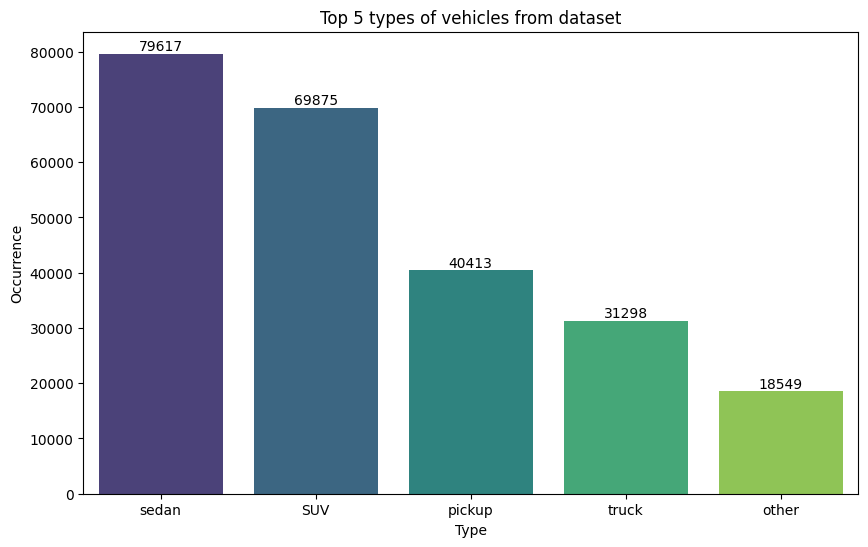

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=most_common_types.index, y=most_common_types.values, palette='viridis')
plt.title('Top 5 types of vehicles from dataset')
plt.xlabel('Type')
plt.ylabel('Occurrence')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

Based on 1.2b, we could have said that the most popular used kind of vehicle was a pickup, with the Ford F-150 being its representative. However, it is not enough to beat the less individually popular but collectively strong sedans. 

In [12]:
top_sedans = main_df[(main_df['type'] == 'sedan')]['model'].value_counts().head(5)
top_sedans

model
camry      2247
accord     1900
altima     1765
civic      1640
corolla    1579
Name: count, dtype: int64

## 1.4 - What is the distribution of vehicle prices?

In [13]:
main_df["price"].nlargest(10)

286870    3736928711
320909    3736928711
82174     3024942282
231235    3024942282
166516    1410065407
137745    1234567890
26770     1111111111
208479     135008900
123732     123456789
174709     123456789
Name: price, dtype: int64

In [14]:
display(main_df.loc[main_df['price'] == main_df["price"].max()])

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,type,paint_color,description,state,lat,long,posting_date,post_day,post_month,post_year
286870,7308056031,eugene,https://eugene.craigslist.org,3736928711,2007,toyota,tundra,excellent,8 cylinders,gas,...,pickup,silver,Selling my 2007 Toyota Tundra SR5 four wheel d...,or,44.066092,-124.037561,2021-04-17 01:16:12+00:00,17,4,2021
320909,7302445002,knoxville,https://knoxville.craigslist.org,3736928711,1999,toyota,4runner,fair,6 cylinders,gas,...,NaN,green,"99 four runner 211,000 miles runs great 4x4 wo...",tn,36.081000,-83.567300,2021-04-06 03:15:48+00:00,6,4,2021


In [15]:
aa = main_df.loc[main_df["type"] == "sedan"]["price"].nlargest(10)
main_df[(main_df['price'].isin(aa)) & (main_df["type"] == "sedan")].sort_values(by='price', ascending=False).head(4)



,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,type,paint_color,description,state,lat,long,posting_date,post_day,post_month,post_year
123732,7314339777,spokane / coeur d'alene,https://spokane.craigslist.org,123456789,1999,buick,regal,like new,6 cylinders,gas,...,sedan,white,This supercharged regal is no longer charged s...,id,47.695200,-117.365800,2021-04-29 15:48:15+00:00,29,4,2021
174709,7315524207,ann arbor,https://annarbor.craigslist.org,123456789,2015,chevrolet,cruze,like new,NaN,gas,...,sedan,red,PLEASE CALL FOR PRICING ON THE LOT AND FOR S...,mi,41.381500,-83.650700,2021-05-01 21:44:14+00:00,1,5,2021
62036,7302895209,ventura county,https://ventura.craigslist.org,2000000,2002,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,...,sedan,green,No longer need runs and drives great. This ca...,ca,34.236498,-119.039074,2021-04-06 23:40:31+00:00,6,4,2021
163111,7316796847,baltimore,https://baltimore.craigslist.org,209995,2020,mercedes-benz,mercedes-maybach s-class,NaN,12 cylinders,gas,...,sedan,black,*** This 2020 Mercedes-Benz Mercedes-Maybach S...,md,39.456700,-76.969600,2021-05-04 17:04:04+00:00,4,5,2021


C:\Users\thebo\AppData\Local\Temp\ipykernel_45656\1462879325.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='price', data=df_filtered, palette='coolwarm')


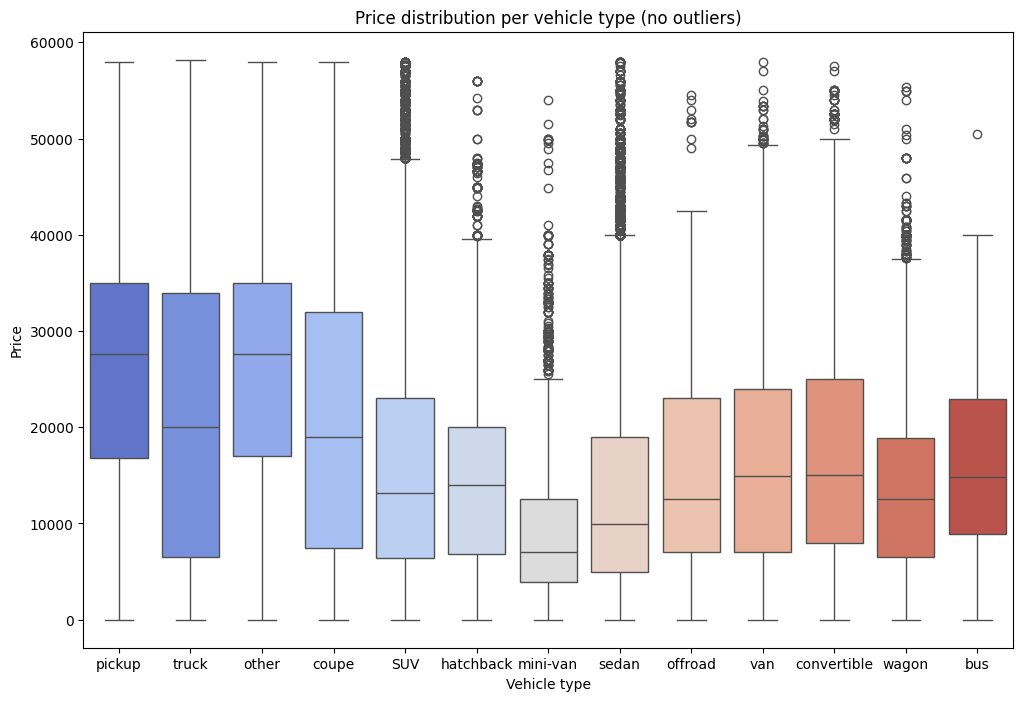

In [16]:
Q1 = main_df['price'].quantile(0.25)
Q3 = main_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#IQR method to deal with outliers (cf. upper)

df_filtered = main_df[(main_df['price'] >= lower_bound) & (main_df['price'] <= upper_bound)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='price', data=df_filtered, palette='coolwarm')
plt.title('Price distribution per vehicle type (no outliers)')
plt.xlabel('Vehicle type')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

In [17]:
round(main_df.price.median())

13998

In [18]:
round(main_df.price.mean())

64795

As we saw, there are some serious outliers in the price data (e.g., $3.7 billions for a Toyota Tundra/4 Runner...). I do not know if the data are corrupted or if the prices were set by the users this way but we will consider them as outliers only (not *errors*). Given this, we cannot rely on the mean average price without excluding these data points. However, based on the median, the average price for a used car seems to be around $14k.

- Pickups and 'others' have the higher prices
- Minivan is the least expensive type of vehicle
- Sedans are mostly priced between $5k-20k which seems coherent with the most expensive one being a mercedes-maybach s-class ($210k)

## 1.5 - Years of manufacture

What is the distribution of vehicle manufacturing years?
What are the newest and oldest models in the dataset?

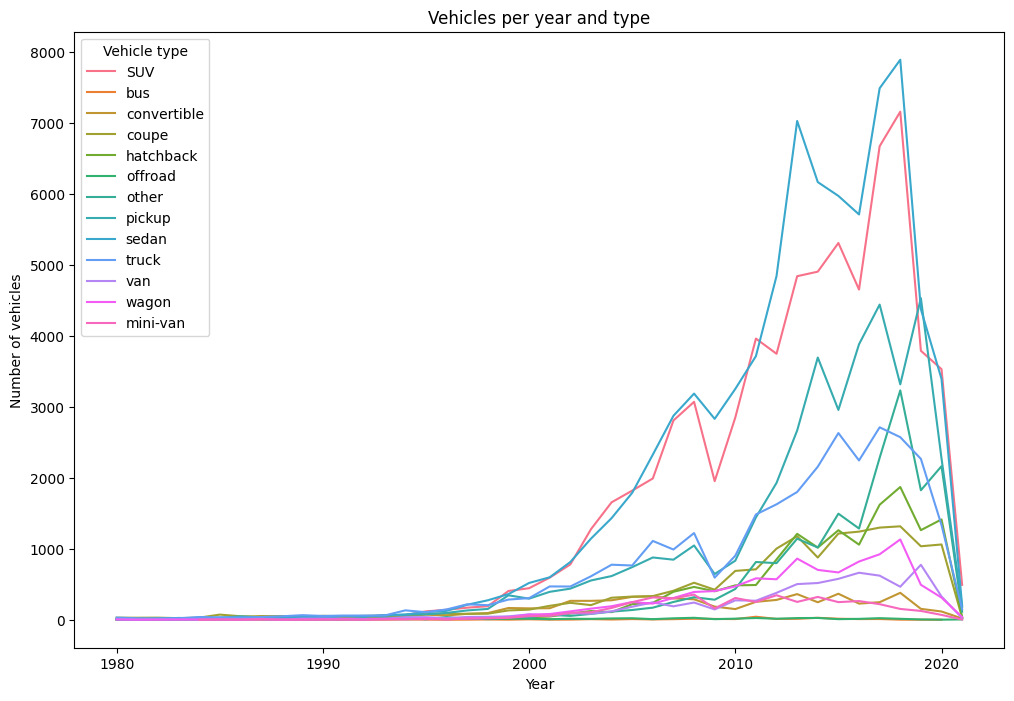

In [19]:
main_df_filtered = main_df[main_df['year'] >= 1980]
vehicle_counts = main_df_filtered.groupby(['year', 'type']).size().reset_index(name='count')


#vehicle_counts = main_df.groupby(['year', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='count', hue='type', data=vehicle_counts)
plt.title('Vehicles per year and type')
plt.xlabel('Year')
plt.ylabel('Number of vehicles')
plt.legend(title='Vehicle type')
plt.show()

- SUV appear in the 2000 with a constant growth until 2018 (which is logical as it is used cars data from few years ago, newest vehicules were not in the second market yet)
- There is a significant dip around 2008

## 1.6 - Energy type

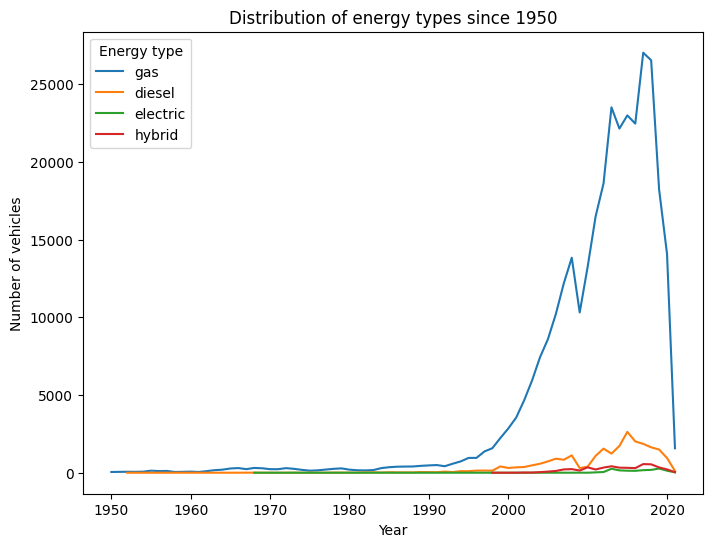

In [20]:
main_df_filtered = main_df[(main_df['year'] >= 1950)&(main_df["fuel"] != "other")]

energy_counts = main_df_filtered.groupby(['year', 'fuel']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.lineplot(x='year', y='count', hue='fuel', data=energy_counts)
plt.title('Distribution of energy types since 1950')
plt.xlabel('Year')
plt.ylabel('Number of vehicles')
plt.legend(title='Energy type')
plt.show()


- Gas is by far the most represented type of energy
- Diesel shows a growth between 2000 and 2015 (might be linked to the Dieselgate)
- Electric and hybrid vehicles are gaining market shares but were mostly anecdotal at the time of the data collection

## 1.7 - Transmission

In [21]:
transmission = main_df['transmission'].value_counts()

C:\Users\thebo\AppData\Local\Temp\ipykernel_45656\1034543166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=transmission.index, y=transmission.values, palette='viridis')


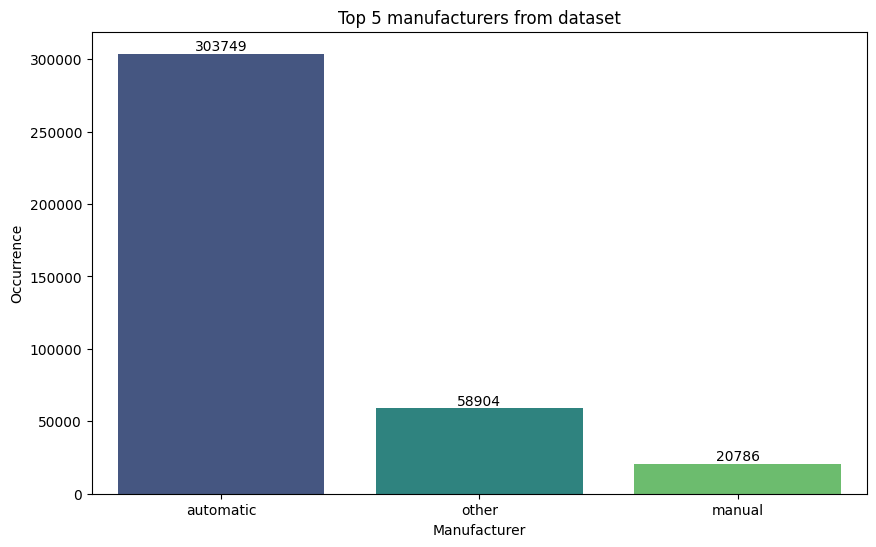

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=transmission.index, y=transmission.values, palette='viridis')
plt.title('Top 5 manufacturers from dataset')
plt.xlabel('Manufacturer')
plt.ylabel('Occurrence')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

As this data is from the USA, this simple chart illustrates the well-known reality of transmission preferences. Automatic gearboxes are more than 10x more popular than the manual ones.

## 1.8 - Paint colors

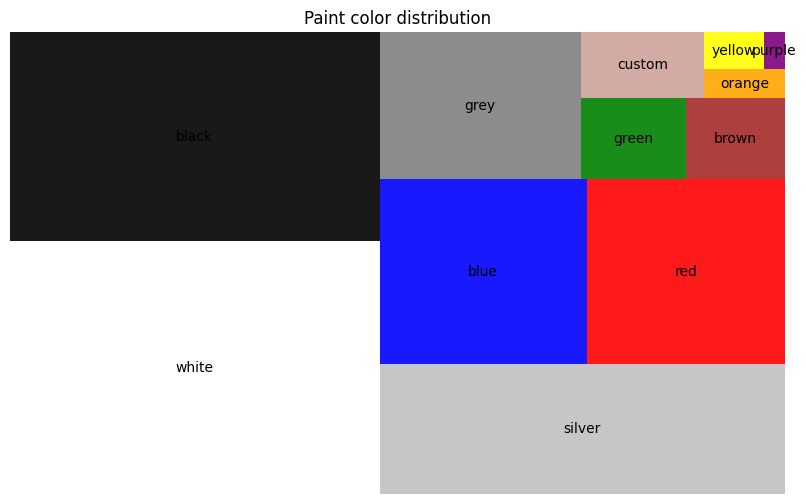

In [23]:
def get_color(color_name):
    try:
        return name_to_hex(color_name)
    except ValueError:
        return '#CDA29B'  

color_counts = main_df['paint_color'].value_counts()
colors = [get_color(color) for color in color_counts.index]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=color_counts.values, label=color_counts.index, color=colors, alpha=0.9)
plt.title('Paint color distribution')
plt.axis('off')
plt.show()


# 2 - Correlation Questions

## 2.1 - First exploration on available numerical values

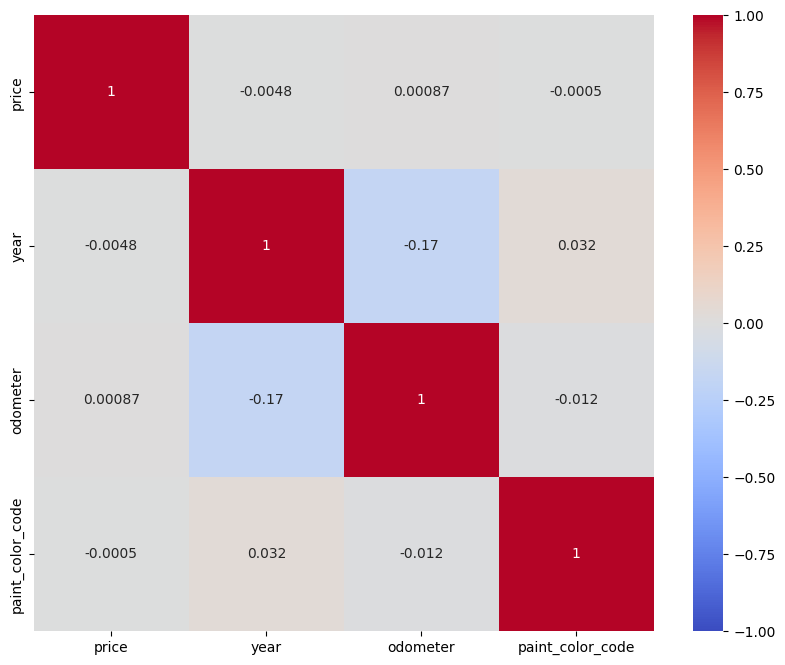

In [24]:
corrtest_df = main_df

# add codes for color names
corrtest_df['paint_color_code'] = corrtest_df['paint_color'].astype('category').cat.codes

corr_matrix = corrtest_df[['price', 'year', 'odometer', 'paint_color_code']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


It works but it is not informative (yet)

## 2.2 - Focus on paint colors

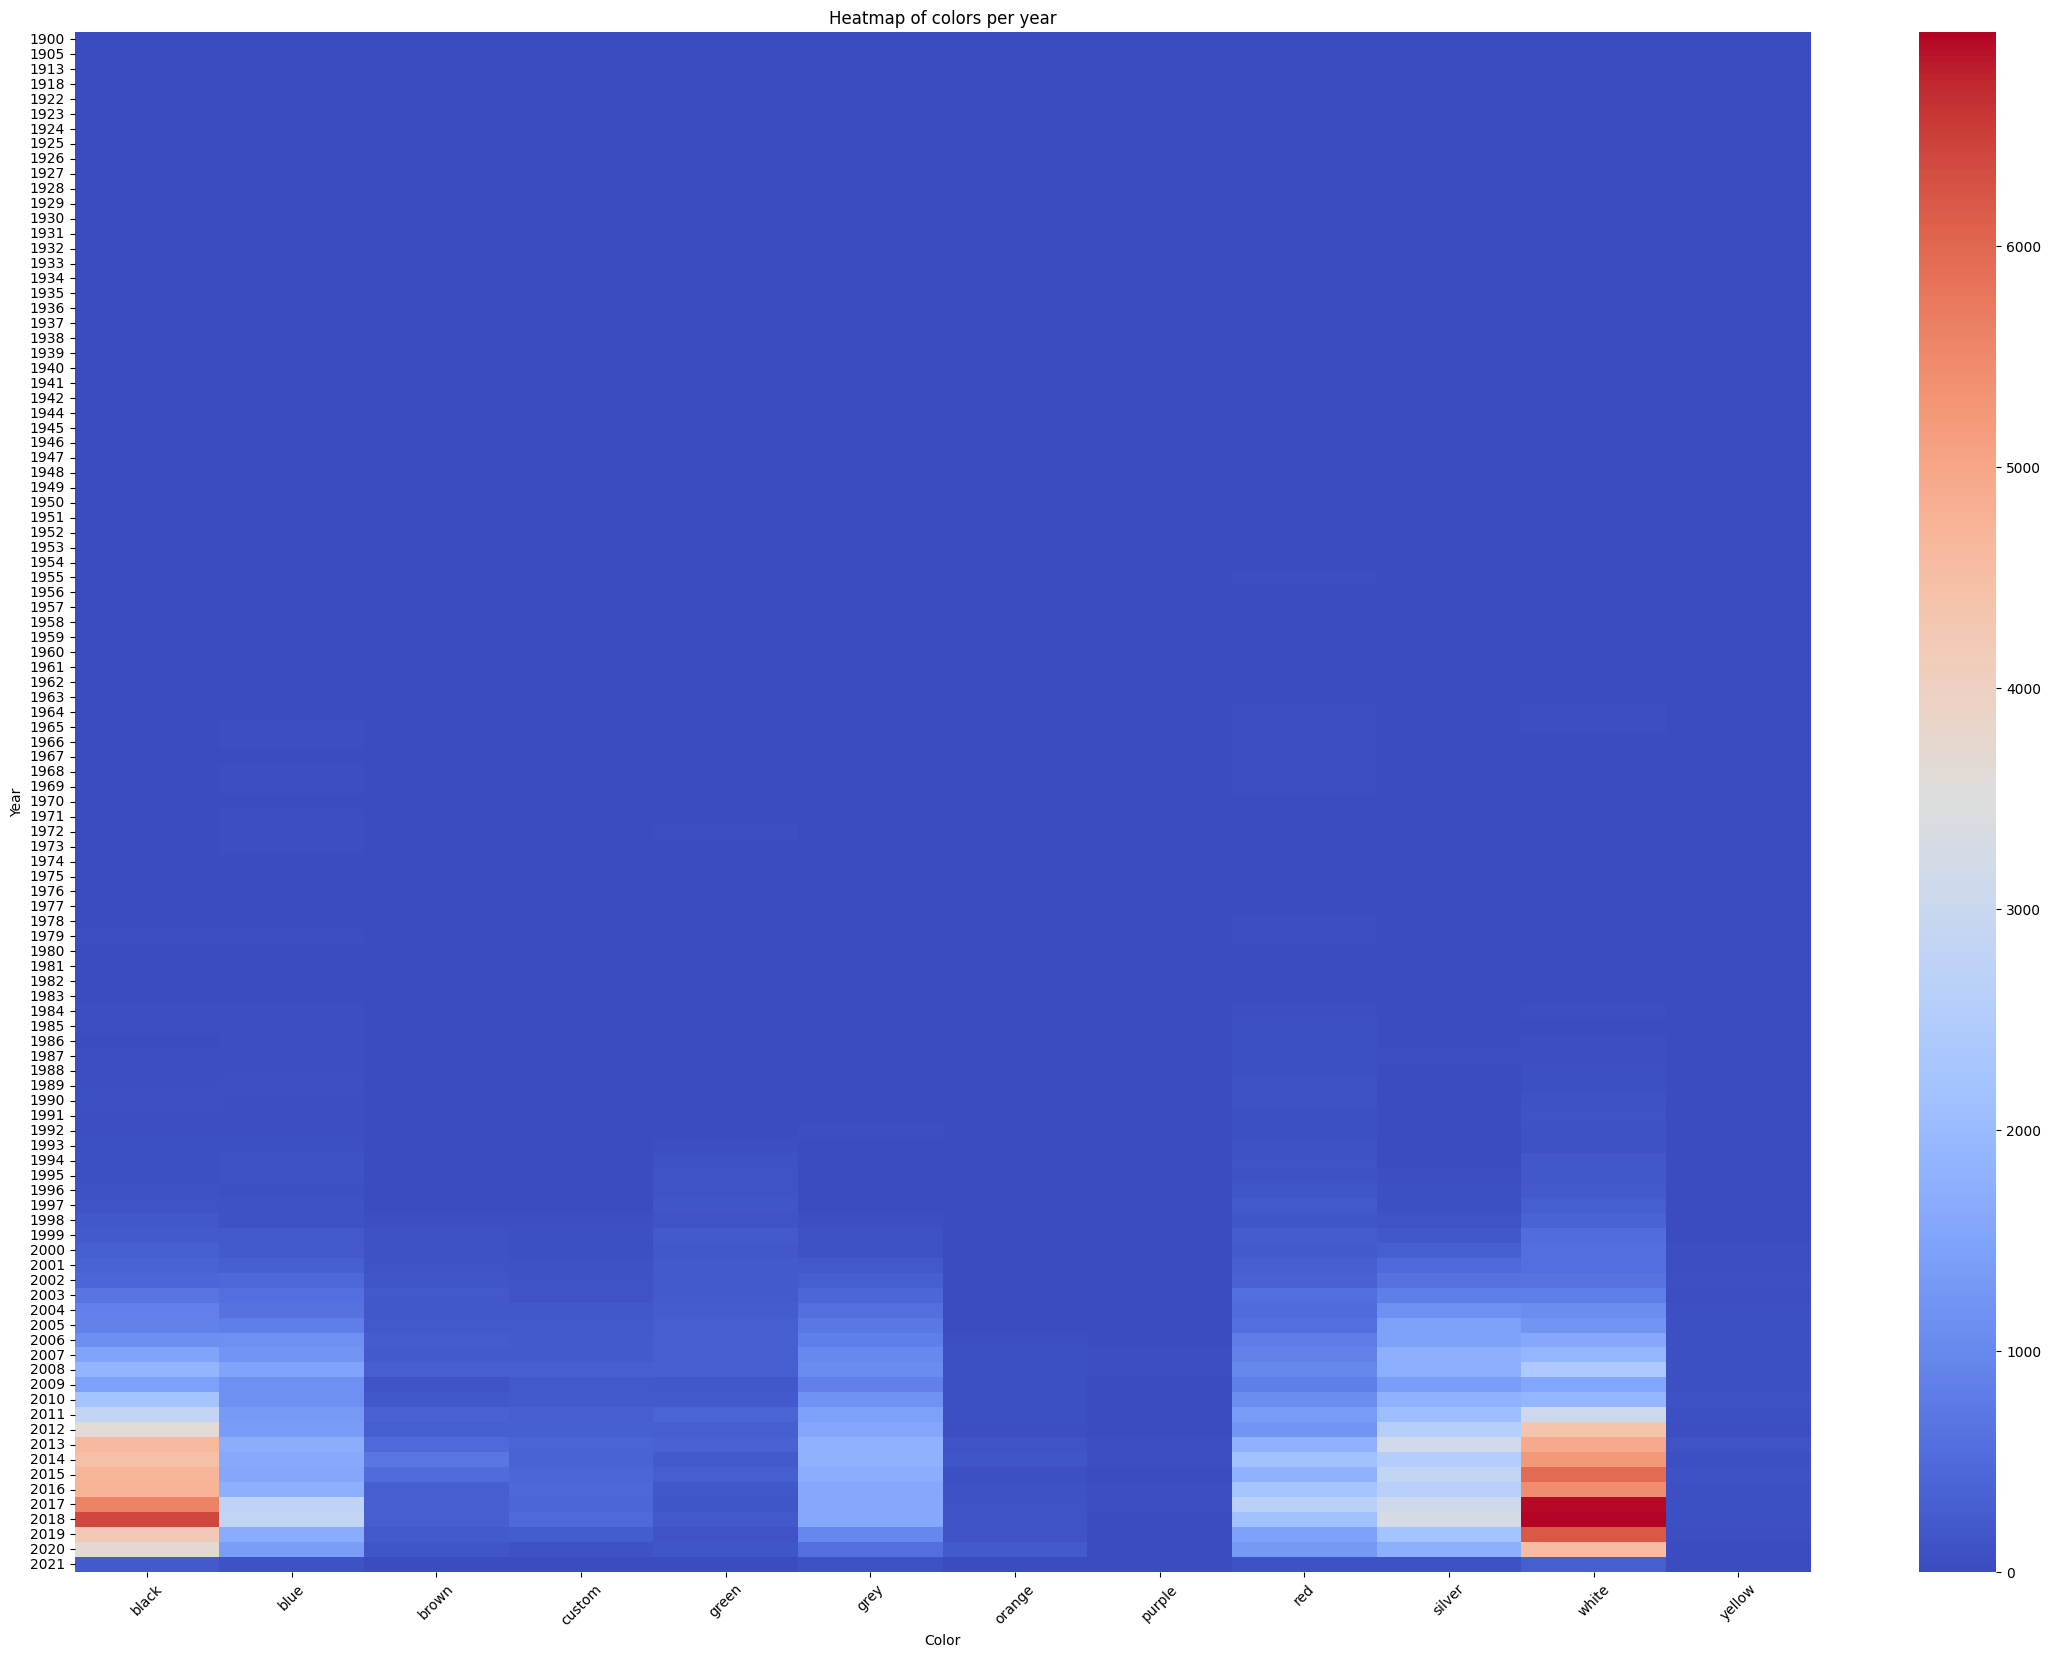

In [25]:
contingency_matrix = pd.crosstab(main_df['year'], main_df['paint_color'])

plt.figure(figsize=(28, 20))
sns.heatmap(contingency_matrix, annot=False, cmap='coolwarm', fmt='d')
plt.title('Heatmap of colors per year')
plt.xlabel('Color')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.show()

It's too much and data seems to be less available before 1980, so let's cut them for the purpose of this exercice

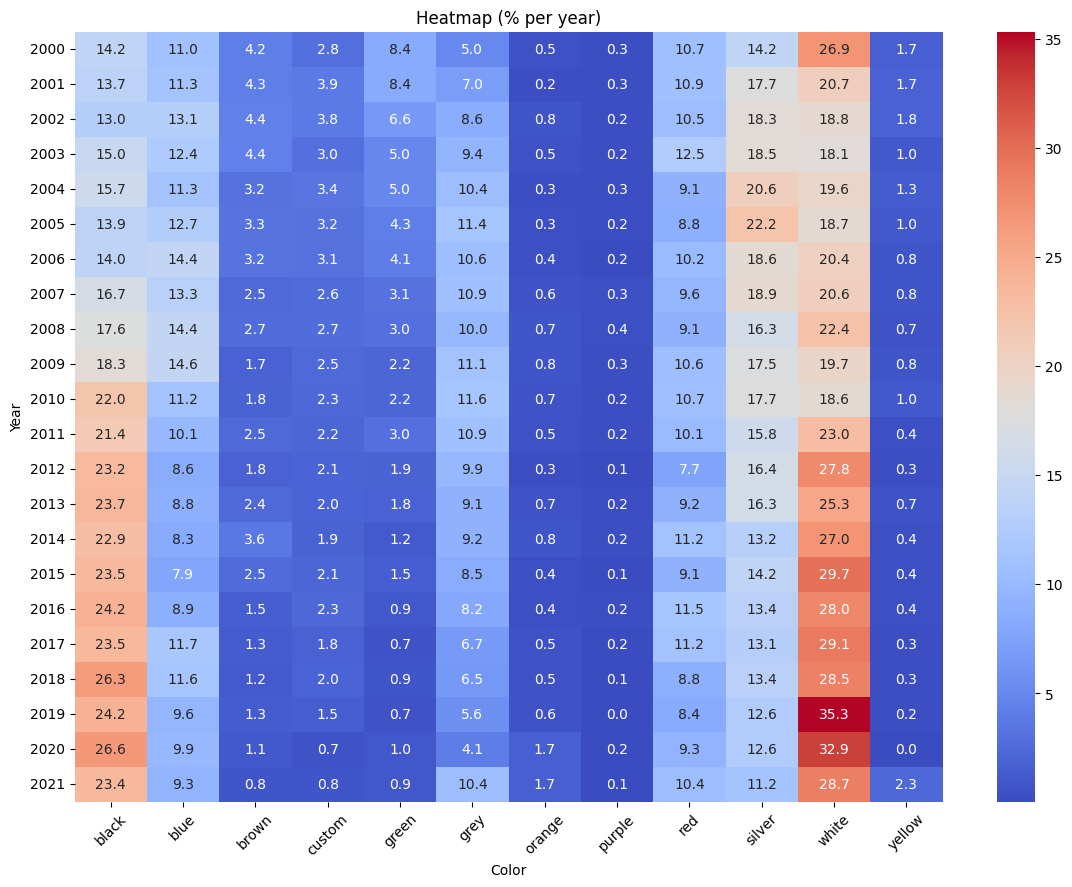

In [26]:
df_filtered_corr = main_df[main_df['year'] >= 2000]

contingency_matrix = pd.crosstab(df_filtered_corr['year'], df_filtered_corr['paint_color'])

percentage_matrix = contingency_matrix.div(contingency_matrix.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 10))
sns.heatmap(percentage_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap (% per year)')
plt.xlabel('Color')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.show()


We can see that cars are mostly black or white (has seen in [previous exploration](#18---paint-colors)) but what this heatmap is giving us is the color evolution from 2000 (based on used cars available at the time of collection) :
- Black has seen a progression since 2000 and is now the second most popular color when it was third in 2005 (followed closely by others)
- Cars were a bit more blue before 2010
- Brown, green, yellow, purple and custom colors have been losing market share after a relatively bigger presence in the 2010s
- On the contrary, orange seems to be progressing in the most recent years
- Grey, red and silver appear to be a second choice (after black and white). Grey was more present between 2005 and 2015 than now but 2021 shows signs of a potential resurgence. Silver is still loosing, slowly but surely, shares since its peak in 2005. Red maintained a consistent share of around 10% in our selected range.

## 2.3 - Correlation between price, year and odometer

### 2.3.1 - Heatmap

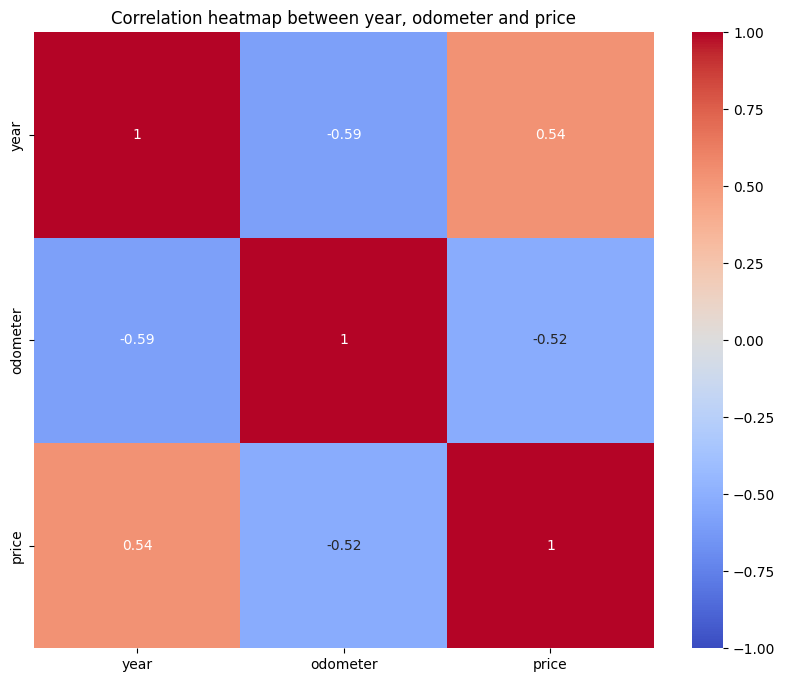

In [27]:
#we have to filter the dataframe to avoid erroneous data/outliers
price_threshold = 1_000_000 
odometer_threshold = 500_000 
df_filtered = main_df[(main_df['price'] <= price_threshold) & (main_df['price'] > 500) & (main_df['odometer'] <= odometer_threshold) & (main_df['year'] >= 1980)]

corr_matrix = df_filtered[['year', 'odometer', 'price']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap between year, odometer and price')
plt.show()

This heatmap shows us that within our selected range (with a moderate correlation |0.5|-|0.6|):
- More recent vehicles tend to be more expensive
- Vehicles with higher mileage tend to be less expensive
- More recent vehicles tend to have lower mileage

These findings are not be revolutionary but it is always interesting to see if they confirm common knowledge and market sentiments.

### 2.3.2 - Hexbin

<Figure size 1000x600 with 0 Axes>

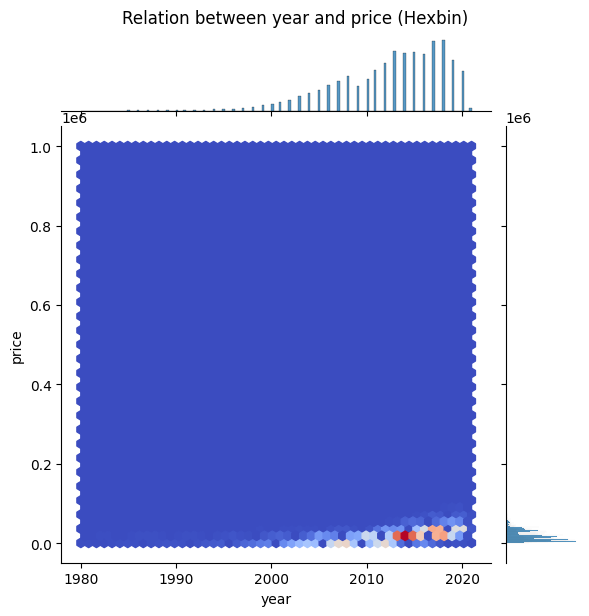

<Figure size 1000x600 with 0 Axes>

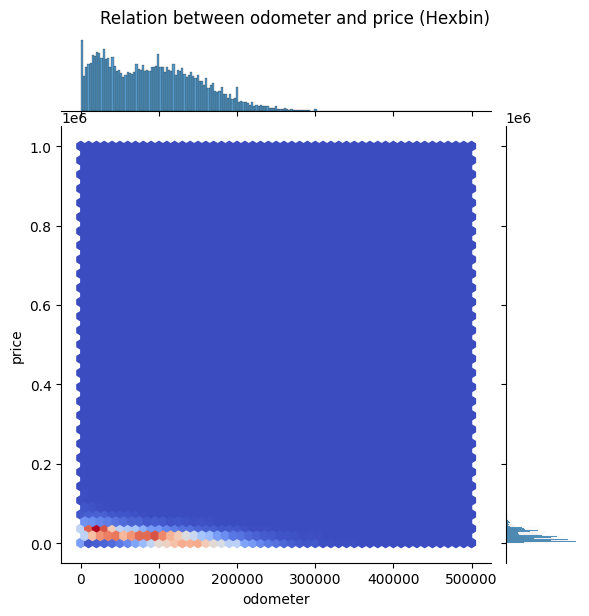

<Figure size 1000x600 with 0 Axes>

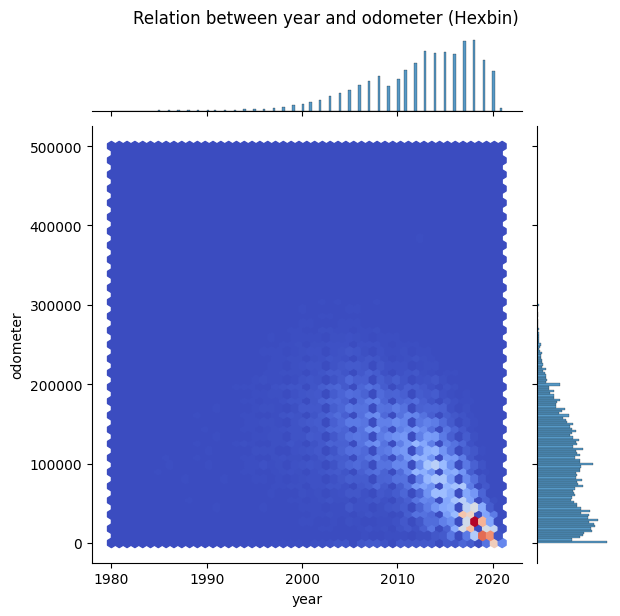

In [28]:
#with the same filtered df, we can also use the hexbin type of plot to analyze potential correlations

plt.figure(figsize=(10, 6))
sns.jointplot(data=df_filtered, x='year', y='price', kind='hex', cmap='coolwarm')
plt.suptitle('Relation between year and price (Hexbin)', y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
sns.jointplot(data=df_filtered, x='odometer', y='price', kind='hex', cmap='coolwarm')
plt.suptitle('Relation between odometer and price (Hexbin)', y=1.02)
plt.show()

# Hexbin plot entre année et odomètre
plt.figure(figsize=(10, 6))
sns.jointplot(data=df_filtered, x='year', y='odometer', kind='hex', cmap='coolwarm')
plt.suptitle('Relation between year and odometer (Hexbin)', y=1.02)
plt.show()

## 2.4 - Price evolution per kilometers

C:\Users\thebo\AppData\Local\Temp\ipykernel_45656\1545959568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['odometer_bin'] = pd.cut(df_filtered['odometer'], bins=50)
C:\Users\thebo\AppData\Local\Temp\ipykernel_45656\1545959568.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  odometer_price_mean = df_filtered.groupby('odometer_bin')['price'].median()


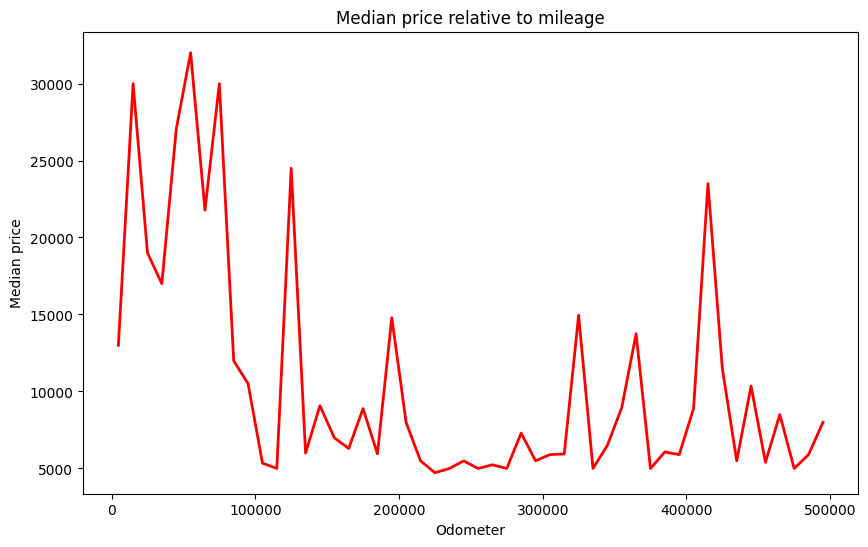

In [29]:
df_filtered['odometer_bin'] = pd.cut(df_filtered['odometer'], bins=50)

odometer_price_mean = df_filtered.groupby('odometer_bin')['price'].median()

odometer_bins = pd.IntervalIndex(df_filtered['odometer_bin'].unique())
odometer_midpoints = [(interval.left + interval.right) / 2 for interval in odometer_bins]

smoothed_data = pd.DataFrame({
    'odometer': odometer_midpoints,
    'price': odometer_price_mean
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=smoothed_data, x='odometer', y='price', color='red', linewidth=2)
plt.title('Median price relative to mileage')
plt.xlabel('Odometer')
plt.ylabel('Median price')
plt.show()

## 2.5 - Focus on cylinders

### 2.5.1 - Convertion to numerical

In [30]:
def convert_cylinders(cylinder_str):
    if pd.isna(cylinder_str) or cylinder_str == 'other':
        return None
    return int(cylinder_str.split()[0]) #or regex but as seen in data_explo, this solution also works

df_filtered = main_df[(main_df['price'] <= 100_000) & (main_df['price'] > 500) & (main_df['odometer'] <= odometer_threshold) & (main_df['year'] >= 1980)].copy()

df_filtered['num_cylinders'] = df_filtered['cylinders'].apply(convert_cylinders)
df_filtered['num_cylinders'] = df_filtered['num_cylinders'].astype('Int64')

print(df_filtered[['cylinders', 'num_cylinders']].sample(5))

          cylinders  num_cylinders
206889  4 cylinders              4
39890   4 cylinders              4
352312  6 cylinders              6
382585  8 cylinders              8
19398   8 cylinders              8


### 2.5.2 - Correlation between cylinders number and price

Correlation between number of cylinders and price = 0.36


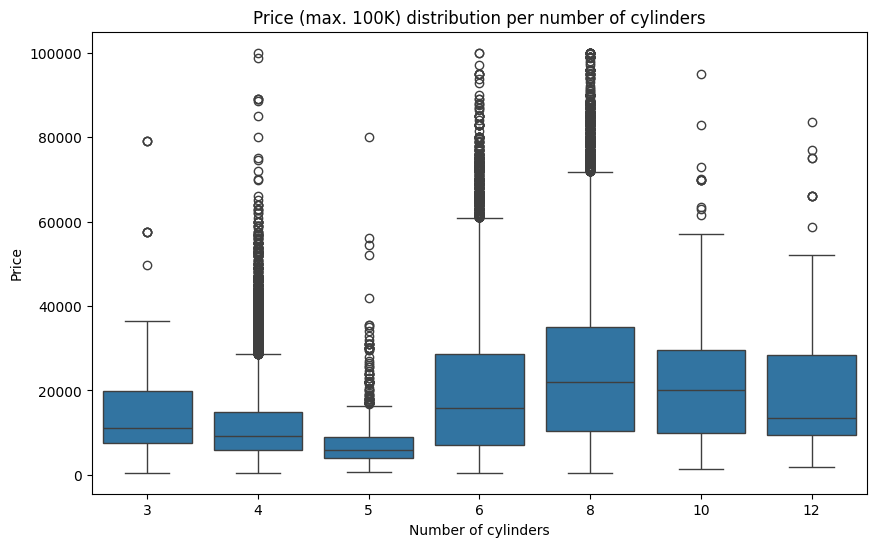

In [31]:
correlation = df_filtered['num_cylinders'].corr(df_filtered['price'], method='pearson')
print(f'Correlation between number of cylinders and price = {round(correlation, 2)}')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='num_cylinders', y='price')
plt.title('Price (max. 100K) distribution per number of cylinders')
plt.xlabel('Number of cylinders')
plt.ylabel('Price')
plt.show()

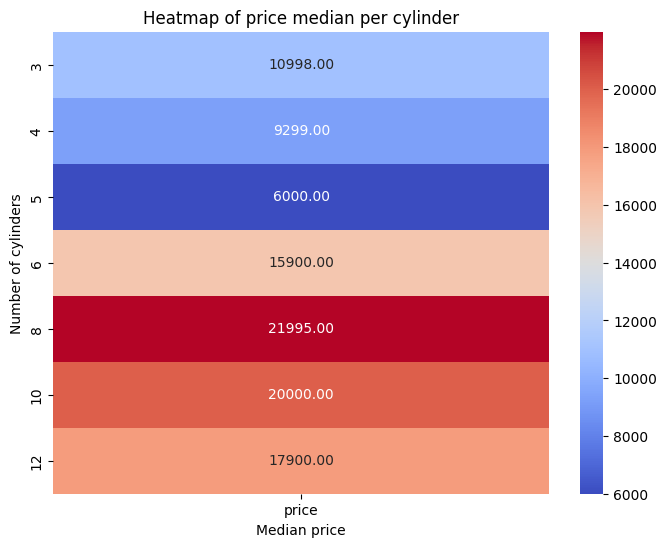

In [32]:
#no price limitation needed here
df_filtered = main_df[(main_df['price'] > 500) & (main_df['odometer'] <= odometer_threshold) & (main_df['year'] >= 1980)].copy()
df_filtered['num_cylinders'] = df_filtered['cylinders'].apply(convert_cylinders)
df_filtered['num_cylinders'] = df_filtered['num_cylinders'].astype('Int64')

pivot_table = df_filtered.pivot_table(values='price', index='num_cylinders', aggfunc='median')
pivot_table.sort_index()

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Heatmap of price median per cylinder')
plt.ylabel('Number of cylinders')
plt.xlabel('Median price')
plt.show()

### 2.5.3 - Distribution of cylinders number per year 

<Figure size 1400x800 with 0 Axes>

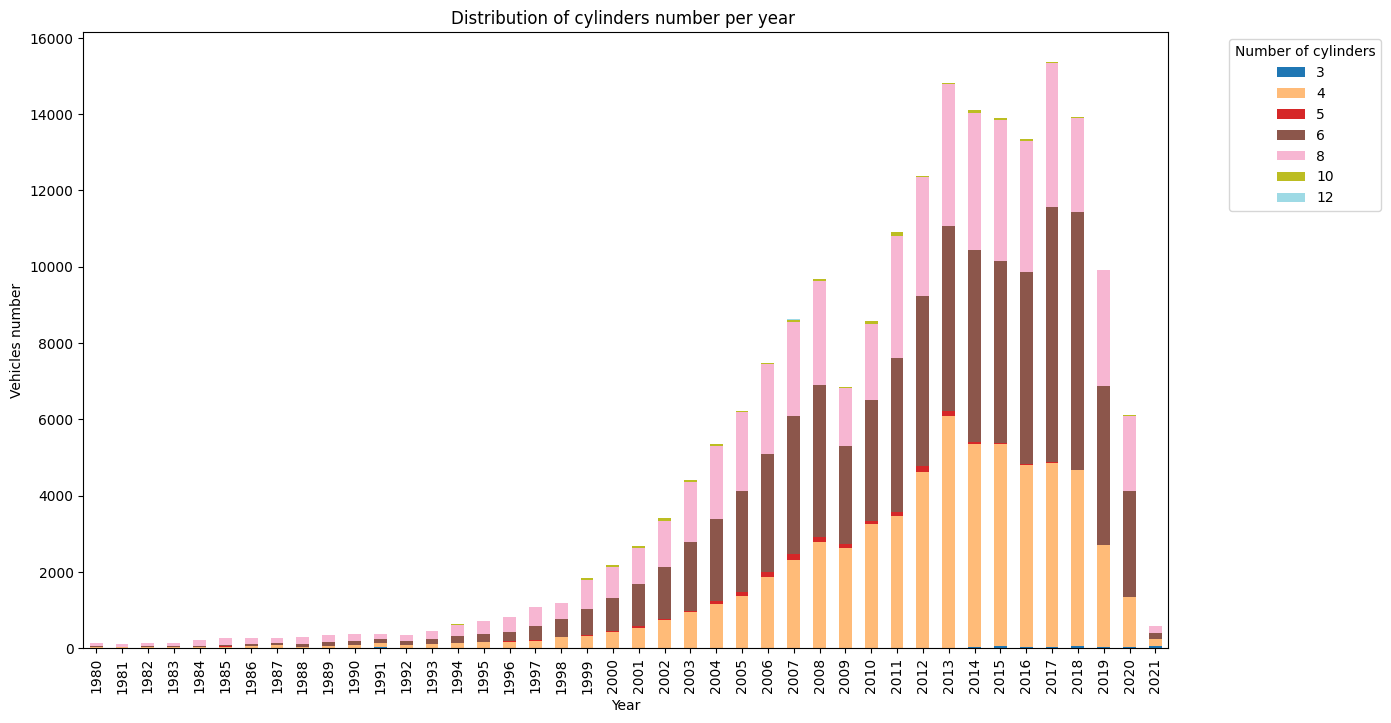

In [33]:
cylinders_by_year = df_filtered.groupby(['year', 'num_cylinders']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
cylinders_by_year.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Distribution of cylinders number per year ')
plt.xlabel('Year')
plt.ylabel('Vehicles number')
plt.legend(title='Number of cylinders', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()